# Tutorial: Data on Manifolds

In [1]:
import geomstats
geomstats.__file__

ModuleNotFoundError: No module named 'geomstats'

## Setup

In [21]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

We import the backend that will be used for geomstats computations and set a seed for reproducibility of the results.

In [22]:
import geomstats.backend as gs

gs.random.seed(2020)

Finally, we import the visualization classes.

In [41]:
import matplotlib
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


from geomstats.visualization import Sphere, Trihedron, PoincareDisk

## From data on linear spaces to data on manifolds

The **science of Statistics** is defined as the collection of data, their analysis and interpretation. Statistical theory is usually defined for data belonging to vector spaces, which are _linear spaces_. For example, we know how to compute the mean of a data set of numbers, like the mean of students' weights in a classroom, or of multidimensional arrays, like the average 3D velocity vector of blood cells in a vessel.

Here is an example of the computation of the mean of two arrays of dimension 2.

In [24]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 2

euclidean = Euclidean(dim=dim)
points_in_linear_space = euclidean.random_point(n_samples=n_samples)
print('Points in linear space:\n', points_in_linear_space)

linear_mean = gs.sum(points_in_linear_space, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in linear space:
 [[ 0.97255366  0.74678389]
 [ 0.01949105 -0.45632857]]
Mean of points:
 [0.49602235 0.14522766]


We plot the points and their mean on the 2D Euclidean space, which is a linear space: a plane.

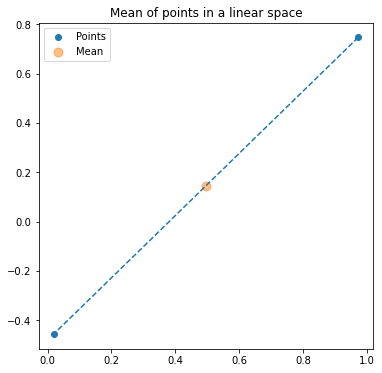

In [25]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1], label='Points')
ax.plot(points_in_linear_space[:, 0], points_in_linear_space[:, 1], linestyle='dashed')

ax.scatter(
    gs.to_numpy(linear_mean[0]), 
    gs.to_numpy(linear_mean[1]), label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points in a linear space')
ax.legend();

What happens to the usual statistical theory when the data doesn't naturally belong to a linear space. For example, if we want to perform statistics on the coordinates of world cities, which lie on the earth: a sphere? 

The non-linear spaces we consider are called manifolds. A manifold $M$ of dimension $m$ is a space that is allowed to be curved but that looks like an $m$-dimensional vector space in the neighborhood of every point. 

A sphere, like the earth, is a good example of a manifold. We know that the earth is curved, but at our scale we do not see its curvature. Can we still use linear statistics when data are defined on these manifolds, or shall we? 

Let's try.

In [26]:
from geomstats.geometry.hypersphere import Hypersphere

s2 = Hypersphere(dim=dim)
points_in_manifold = s2.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 [[-0.71502435 -0.41197257 -0.56481748]
 [-0.997575   -0.04788171  0.05051201]]
Mean of points:
 [-0.85629967 -0.22992714 -0.25715273]


We plot the points and their mean computed with the linear formula.

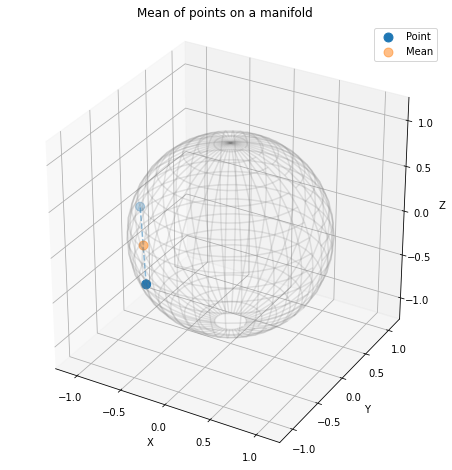

In [27]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sphere = Sphere()
sphere.plot(
    points_in_manifold, ax=ax, space='S2', label='Point', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend();

What happened? The mean of two points on a manifold (the sphere) is not on the manifold. In our example, the mean city is not on the earth. This leads to errors in statistical computations.

In [29]:
print(s2.belongs(linear_mean))

False


For this reason, researchers aim to build a theory of statistics that is by construction compatible with any structure we equip the manifold with. This theory is called _Geometric Statistics_.

**Geometric Statistics** is a theory of statistics on manifolds, that takes into account their geometric structures. Geometric Statistics is therefore the child of two major pillars of Mathematics: Geometry and Statistics.

## Examples of data on manifolds

Why should we bother to build a whole new theory of statistics? Do we really have data that belong to spaces like the sphere illustrated in introduction?

Let's see some examples of data spaces that are naturally manifolds. By doing so, we will introduce the `datasets` and `visualization` modules of `geomstats`.

We first import the `datasets.utils` module that allows loading datasets.

In [30]:
import geomstats.datasets.utils as data_utils

### World cities: data on the sphere

We load the dataset `cities`, that contains the coordinates of world cities in spherical coordinates.

In [31]:
data, names = data_utils.load_cities()
print(names[:5])
print(data[:5])

['Tokyo', 'New York', 'Mexico City', 'Mumbai', 'São Paulo']
[[ 0.61993792 -0.52479018  0.58332859]
 [-0.20994315  0.7285533   0.65202298]
 [ 0.14964311  0.93102728  0.33285904]
 [-0.27867026 -0.9034188   0.32584868]
 [-0.62952884  0.6662902  -0.3996884 ]]


We convert the spherical coordinates to X, Y, Z coordinates and verify that they belong to the sphere.

In [32]:
gs.all(s2.belongs(data))

True

Now, we plot the cities on the sphere. We choose only a subset of the cities that have a nice rendering in the 2D plot of the 3D earth. This plot is nicer shown in an interactive 3D figure.

In [33]:
data, names = data_utils.load_cities()

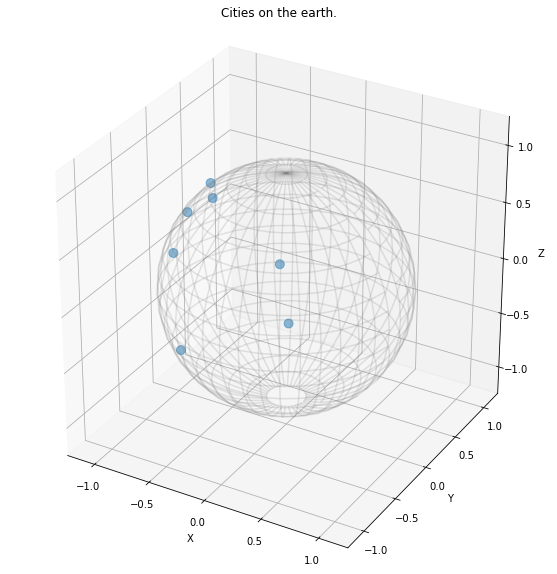

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

sphere.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Cities on the earth.');

### Pose of objects in pictures: data on the Lie group of 3D rotations

We consider the dataset `poses`, that contains the 3D poses of objects in images. Specifically, we consider poses of beds in images, i.e. the 3D orientation of each bed within a given 2D image. 

The orientation corresponds to a 3D rotation. A 3D rotation $R$ is visually represented as the result of $R$ applied to the coordinate frame $(e_x, e_y, e_z)$.

We first load the dataset.

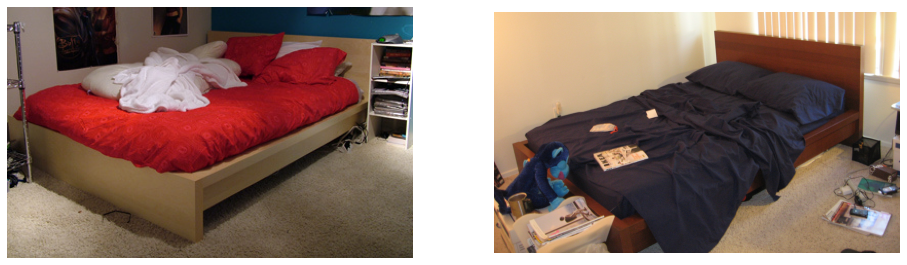

In [35]:
data, img_paths = data_utils.load_poses()

img_path1, img_path2 = img_paths[0], img_paths[1]
img_path1 = os.path.join(data_utils.DATA_PATH, 'poses', img_path1)
img_path2 = os.path.join(data_utils.DATA_PATH, 'poses', img_path2)

img1 = mpimg.imread(img_path1)
img2 = mpimg.imread(img_path2)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
imgplot = ax.imshow(img1)
ax.axis('off')
ax = fig.add_subplot(122)
imgplot = ax.imshow(img2)
ax.axis('off')

plt.show()

We import the manifold of 3D rotations: the Special Orthogonal group in 3D, $SO(3)$. We choose to represent the 3D rotations as rotation vectors, hence: `point_type='vector'`.

In [36]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

so3 = SpecialOrthogonal(n=3, point_type='vector')

We verify that the poses belong to the space of 3D rotations.

In [37]:
gs.all(so3.belongs(data))

True

We plot the orientations of the first 2 beds.

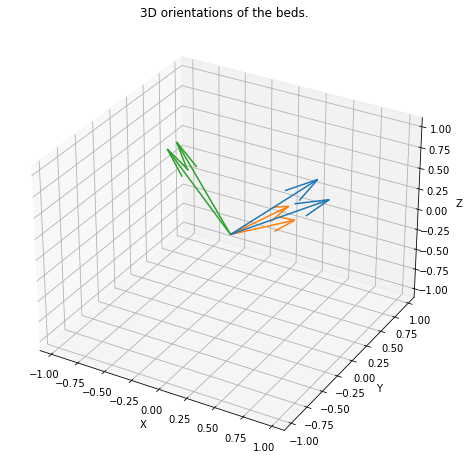

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

Trihedron.plot(data[:2], ax=ax, space='SO3_GROUP')

ax.set_title('3D orientations of the beds.');

These orientations are very close, as expected from the corresponding images.

### Social networks: data on the hyperbolic space

We consider the dataset `karate_graph`, that contains the network of the social interactions of the 34 members of a karate club, for a period of three years from 1970 to 1972. During the study a conflict arose between the administrator and instructor, which led to the split of the club into two. This dataset has been widely used in the machine learning literature as a case-study of clustering on graphs.

We load the dataset.

In [39]:
karate_graph = data_utils.load_karate_graph()

Next, we embed the karate graph into the hyperbolic space.

In [40]:
from geomstats.datasets.prepare_graph_data import HyperbolicEmbedding

hyperbolic_embedding = HyperbolicEmbedding(max_epochs=20)
embeddings = hyperbolic_embedding.embed(karate_graph)

INFO: Number of edges: 34
INFO: Mean vertices by edges: 4.588235294117647
INFO: iteration 0 loss_value 1.804808
INFO: iteration 1 loss_value 1.715917
INFO: iteration 2 loss_value 1.600859
INFO: iteration 3 loss_value 1.507145
INFO: iteration 4 loss_value 1.443382
INFO: iteration 5 loss_value 1.407737
INFO: iteration 6 loss_value 1.400664
INFO: iteration 7 loss_value 1.401131
INFO: iteration 8 loss_value 1.407034
INFO: iteration 9 loss_value 1.361308
INFO: iteration 10 loss_value 1.336164
INFO: iteration 11 loss_value 1.346355
INFO: iteration 12 loss_value 1.348296
INFO: iteration 13 loss_value 1.357157
INFO: iteration 14 loss_value 1.328148
INFO: iteration 15 loss_value 1.360548
INFO: iteration 16 loss_value 1.338015
INFO: iteration 17 loss_value 1.357886
INFO: iteration 18 loss_value 1.294621
INFO: iteration 19 loss_value 1.324022


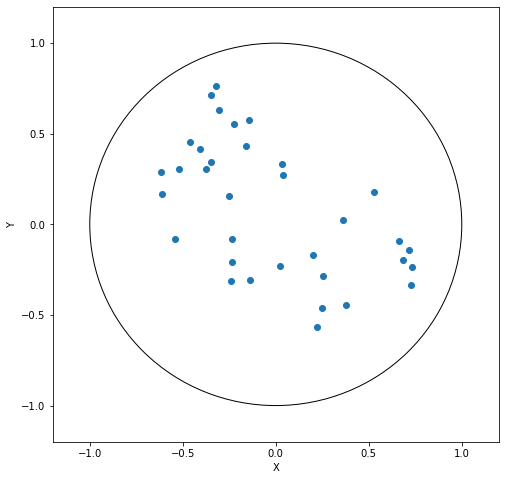

In [42]:
disk = PoincareDisk(point_type='ball')
fig, ax = plt.subplots(figsize=(8, 8))
disk.set_ax(ax)
disk.draw(ax=ax)
ax.scatter(embeddings[:, 0], embeddings[:, 1]);

In this plot, each dot represents a member of the Karate club. The nodes of the social networks have been embedded in the hyperbolic plane. We refer to the notebook `embedding_graph_structured_data_h2` for details on the embedding of networks in the hyperbolic space and the advantages of such procedure.

### Brain connectomes: data on the manifold of Symmetric Positive Definite (SPD) matrices

We consider the dataset `connectomes` that contains brain functional connectomes from the MSLP 2014 Schizophrenia Challenge. The dataset correponds to the Functional Connectivity Networks (FCN) extracted from resting-state fMRIs of 86 patients at 28 Regions Of Interest (ROIs). Roughly, an FCN corresponds to a correlation matrix and can be seen as a point on the manifold of Symmetric Positive-Definite (SPD) matrices.

We can load the dataset.

In [43]:
data, patient_ids, labels = data_utils.load_connectomes()

We plot the first two connectomes from the MSLP dataset with their corresponding labels.

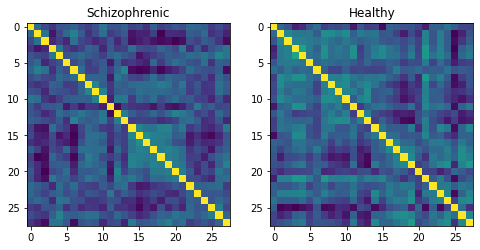

In [44]:
labels_str = ['Healthy', 'Schizophrenic']

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0])
ax.set_title(labels_str[labels[0]])

ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1])
ax.set_title(labels_str[labels[1]])

plt.show()

We check that the connectomes belong to the space of SPD matrices.

In [45]:
import geomstats.geometry.spd_matrices as spd

manifold = spd.SPDMatrices(28)

In [46]:
gs.all(manifold.belongs(data))

True

### Monkey's optical nerve heads: Data as landmarks in 3D

We consider 22 images of Rhesus monkeys’ eyes (11 monkeys), acquired with a Heidelberg Retina Tomograph
and available in (PE2015). For each monkey, an experimental glaucoma was introduced in one eye, while the second
eye was kept as control. One seeks a significant difference between the glaucoma and the
control eyes. On each image, 5 anatomical landmarks were recorded: 
- 1st landmark: superior aspect of the retina, 
- 2nd landmark: side of the retina closest to the temporal bone of the skull,
- 3rd landmark: nose side of the retina, 
- 4th landmark: inferior point,
- 5th landmark: optical nerve head deepest point.

Label 0 refers to a normal eye, and Label 1 to an eye with glaucoma.

##### Reference:

(PE2015) Patrangenaru and L. Ellingson. Nonparametric Statistics on Manifolds and Their Applications to Object Data, 2015. https://doi.org/10.1201/b18969

We load the dataset of landmarks' sets and corresponding labels.

In [47]:
nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)
print(labels)
print(monkeys)

(22, 5, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


We extract the landmarks' sets corresponding to the two eyes' nerves of the first monkey, with their corresponding labels.

In [48]:
two_nerves = nerves[monkeys==0]
print(two_nerves.shape)

two_labels = labels[monkeys==0]
print(two_labels)

(2, 5, 3)
[0 1]


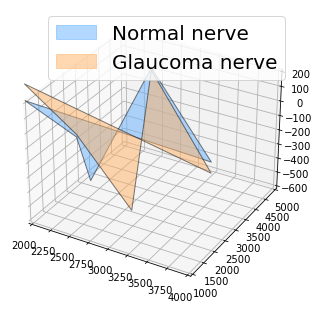

In [49]:
label_to_str = {0: 'Normal nerve', 1: 'Glaucoma nerve'}
label_to_color = {0: (102/255, 178/255, 255/255, 1.), 1: (255/255, 178/255, 102/255, 1.)}

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x,y,z))]
    
    poly = Poly3DCollection(verts, alpha=0.5)
    color =  label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor('k')
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={'size':20})
plt.show()

We observe that the shape of the optical nerve head on the eye with glaucoma is different from the shape of the optical nerve head on the normal eye.

### Cell shapes: Data as curves in 2D

We load the dataset of cells.

The cells have been treated with one of three treatments:
- control (no treatment),
- jasp (jasplakinolide), or
- cytd (cytochalasin D).

These treatments are drugs which perturb the cytoskelet of the cells, and thus the shapes of their boundaries.

In [50]:
cells, cell_lines, treatments = data_utils.load_cells()

We check that the dataset of cells belongs to the manifold of discrete curves.

In [51]:
from geomstats.geometry.discrete_curves import DiscreteCurves
from geomstats.geometry.euclidean import Euclidean

r2 = Euclidean(2)

planar_curves_space = DiscreteCurves(r2)

result = planar_curves_space.belongs(cells)
gs.all(result)

True

We show one of the cells.

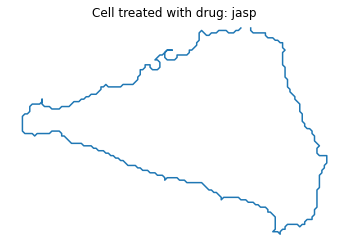

In [52]:
cell_id = 500
cell = cells[cell_id]

plt.plot(cell[:, 0], cell[:, 1])
plt.axis('equal')
plt.title(f"Cell treated with drug: {treatments[cell_id]}")
plt.axis('off');